Install and import required packages and extract data

In [2]:
# Cell 1
#!pip install -r ../requirements.txt

In [3]:
# Cell 2
import warnings
warnings.filterwarnings('ignore')

import pandas_plink as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import numpy as np
from functools import reduce
from sklearn.metrics import r2_score
import random
import os
import tarfile
import gzip
from extract_data import extract_data
#extract_data()
from tools import *


%load_ext autoreload
%autoreload 2

In [4]:
# Cell 3



# IF RUNNING THIS RESULTS IN THE ERROR MESSAGE:
# /bin/bash: ./plink2: Permission denied
# UNCOMMENT THE LINE OF CODE BELOW THIS AND RERUN THE CELL THEN RECOMMENT

#######################################
#!chmod 700 plink2
#!chmod 700 plink
#######################################

# OTHERWISE, SHOULD OUTPUT SOMETHING LIKE 
"""
PLINK v2.0.0-a.6 32-bit (20 Oct 2024)              cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3

  plink2 <input flag(s)...> [command flag(s)...] [other flag(s)...]
  plink2 --help [flag name(s)...]

Commands include --rm-dup list, --make-bpgen, --export, --freq, --geno-counts,
--sample-counts, --missing, --hardy, --het, --fst, --indep-pairwise,
--r2-phased, --sample-diff, --make-king, --king-cutoff, --pmerge, --pgen-diff,
--write-samples, --write-snplist, --make-grm-list, --pca, --glm, --adjust-file,
--gwas-ssf, --pheno-svd, --clump, --score-list, --variant-score,
--genotyping-rate, --pgen-info, --validate, and --zst-decompress.

"plink2 --help | more" describes all functions.

"""
!./plink2


PLINK v2.0.0-a.6 32-bit (20 Oct 2024)              cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3

  plink2 <input flag(s)...> [command flag(s)...] [other flag(s)...]
  plink2 --help [flag name(s)...]

Commands include --rm-dup list, --make-bpgen, --export, --freq, --geno-counts,
--sample-counts, --missing, --hardy, --het, --fst, --indep-pairwise,
--r2-phased, --sample-diff, --make-king, --king-cutoff, --pmerge, --pgen-diff,
--write-samples, --write-snplist, --make-grm-list, --pca, --glm, --adjust-file,
--gwas-ssf, --pheno-svd, --clump, --score-list, --variant-score,
--genotyping-rate, --pgen-info, --validate, and --zst-decompress.

"plink2 --help | more" describes all functions.


Load data

In [5]:
# Cell 4
phenotype_data = '../data/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz'

# alleles = .bim (snp. came from vcf file (txt file))
# samples = .fam (family id)
# genotypes = .bed (genotypes). Rows and columns defined by alleles and samples
(alleles, samples, genotypes) = pp.read_plink("../data/LDREF/1000G.EUR.*",
                             verbose=False)
genotypes = pd.DataFrame(genotypes.compute())
P = pd.read_csv(phenotype_data, sep='\t', compression='gzip')
P

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [6]:
genotypes

,0,1,2,3,4,5,6,7,8,9,...,479,480,481,482,483,484,485,486,487,488
0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
2,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
3,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
4,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190316,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1190317,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
1190318,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1190319,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0


In [7]:
# Cell 5
chr_to_explore = '19'
gene_to_explore = 'ENSG00000083844.5'

# eQTL analysis
temp_analysis = cis_eQTL_analysis(chr_to_explore, gene_to_explore, alleles, samples, genotypes, P)
temp_analysis

,snp,chr,bp,p,se,beta,a0,a1,i
0,rs10420802,19,57202924,0.252129,1.147131,0.058041,C,T,528962
1,rs11084462,19,57203105,0.395616,-0.850548,-0.036289,A,G,528963
2,rs8110561,19,57203735,0.509393,0.660476,0.020464,T,C,528964
3,rs7256661,19,57210786,0.221760,1.224092,0.037748,A,C,528965
4,rs7259910,19,57210943,0.701097,-0.384162,-0.019227,A,C,528966
...,...,...,...,...,...,...,...,...,...
505,rs752150,19,58196207,0.207689,1.262333,0.051717,A,G,529467
506,rs3746208,19,58200099,0.197689,-1.290673,-0.039758,T,C,529468
507,rs12608564,19,58200497,0.412972,0.819675,0.032819,A,G,529469
508,rs12981782,19,58201360,0.536188,0.619213,0.018877,T,C,529470


In [8]:
# Cell 6
# eQTL analysis for all genes on a chromosome
#chr_4_analysis = chr_analysis('4', alleles, samples, genotypes, P)
#chr_4_analysis


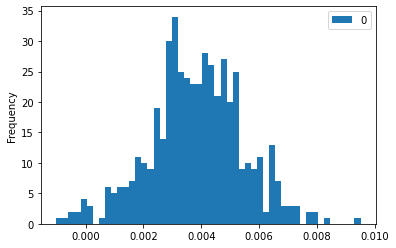

In [11]:
# Cell 7

prs_vals = prs_gene_pipeline(temp_analysis, samples, genotypes, p_val=None)
pd.DataFrame.from_dict(prs_vals, orient='index').plot(kind='hist', bins=50)
plt.show()

In [15]:
# Cell 8
test_risk_scores = generate_prs(gene_to_explore, alleles, samples, genotypes, P, [1, 0.05, 0.01, 0.001, 0.00001], [0.1, 0.2, 0.3, 0.4, 0.5])
#prs_df = pd.DataFrame.from_dict(test_risk_scores, orient='index').reset_index().rename(columns={0:'prs', 'index': 'fid'})
#prs_df['prs'].plot(kind='hist', bins=50)
#plt.show()
test_risk_scores

{'validation': {'best_r2': 0.11077803595247016,
  'best_p_val': 1,
  'best_r2_thresh': 0.2},
 'test': {'test_r2': 0.012202628635738816}}